In [27]:
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [30]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [32]:
df.tail()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [34]:
df.shape

(2035, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [36]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [37]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [38]:
len(df[df.duplicated()])

0

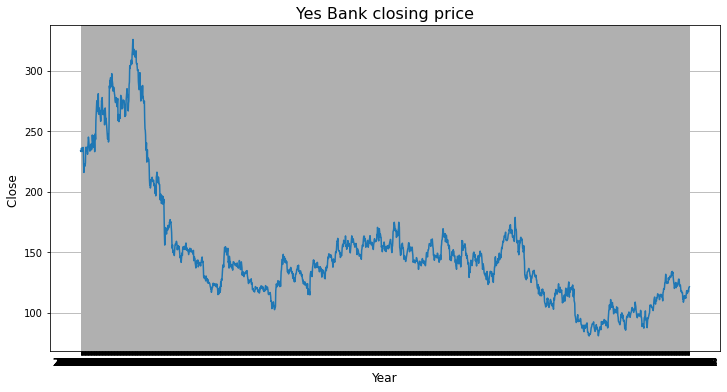

In [44]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close ', fontsize=12)
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price', fontsize=16)
plt.show()

In [52]:
pip install mplfinance

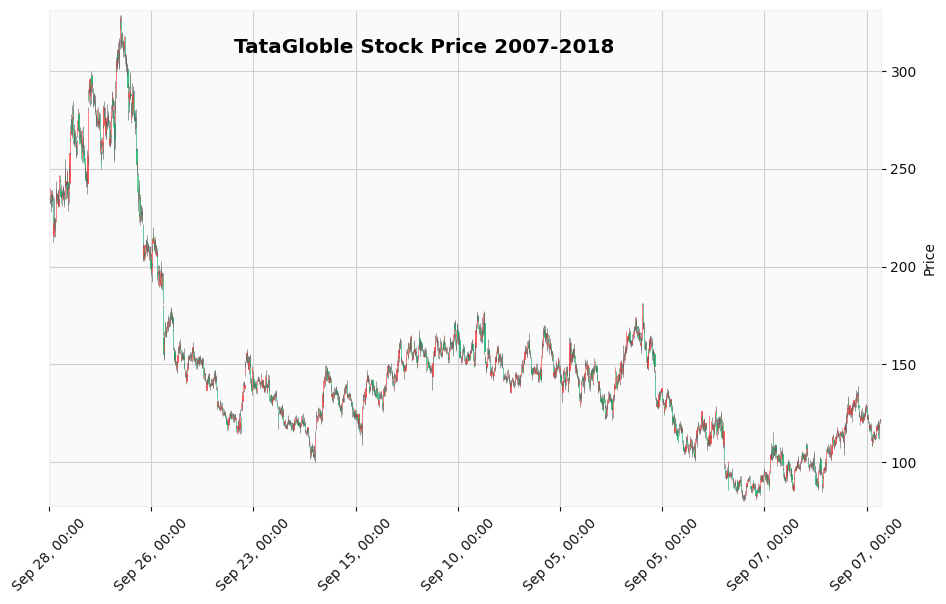

In [53]:
import mplfinance as mpf
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
mpf.plot(df,figratio=(20,12),type="candle",title='TataGloble Stock Price 2007-2018',tight_layout=True,style='yahoo')

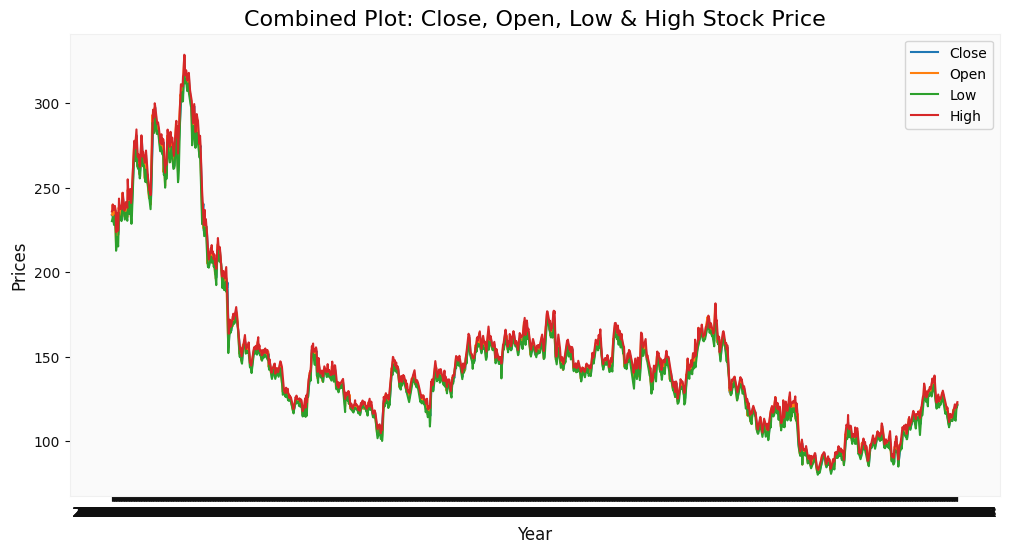

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.grid()

Text(0.5, 1.0, 'Correlation Map')

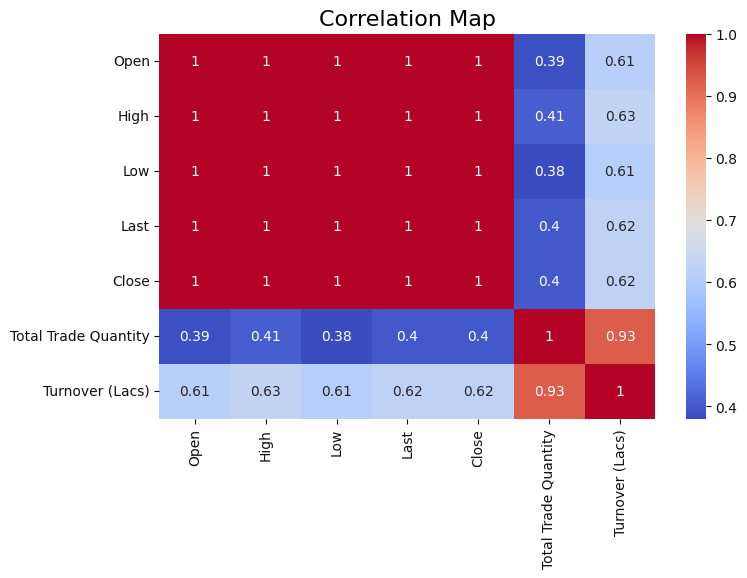

In [54]:
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Map", fontsize=16)

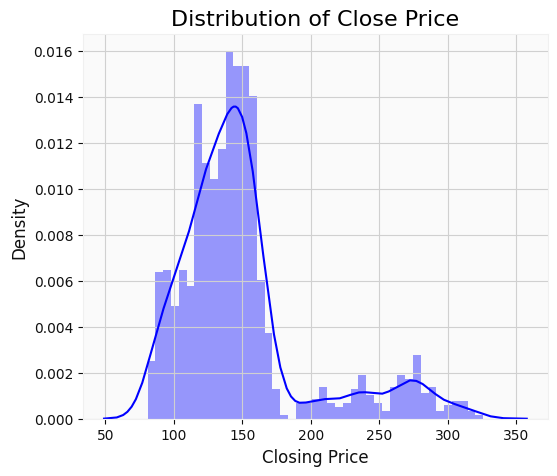

In [55]:
plt.figure(figsize=(6,5))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

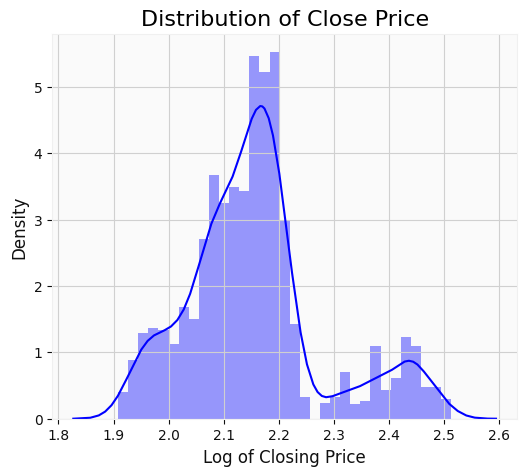

In [56]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [57]:
numerical_features = list(set(df.describe().columns) - {'Close'})
numerical_features

['High', 'Total Trade Quantity', 'Low', 'Open', 'Turnover (Lacs)', 'Last']

<function matplotlib.pyplot.show(close=None, block=None)>

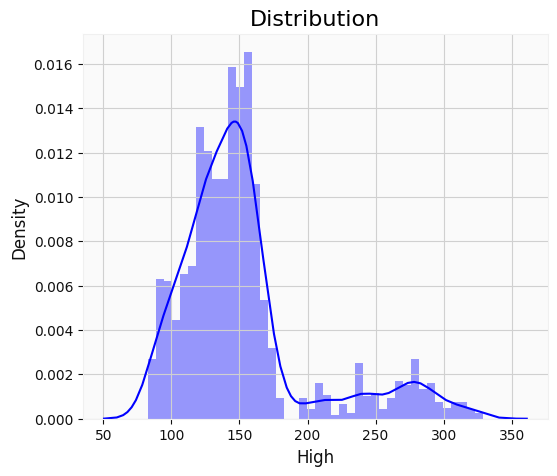

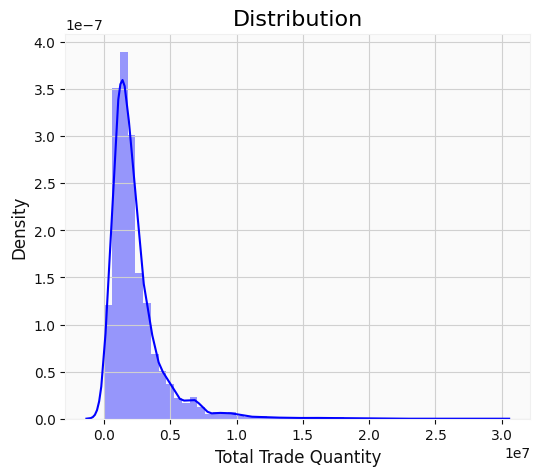

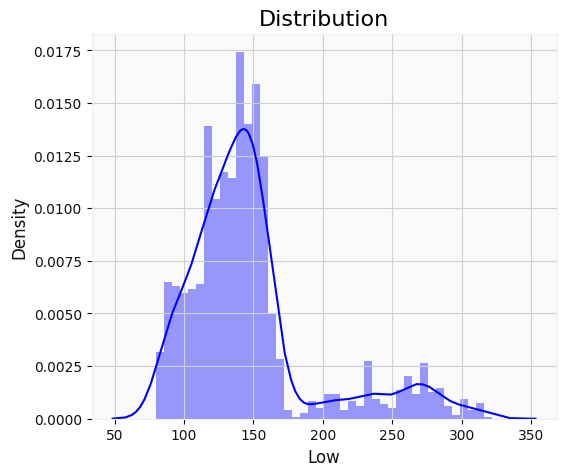

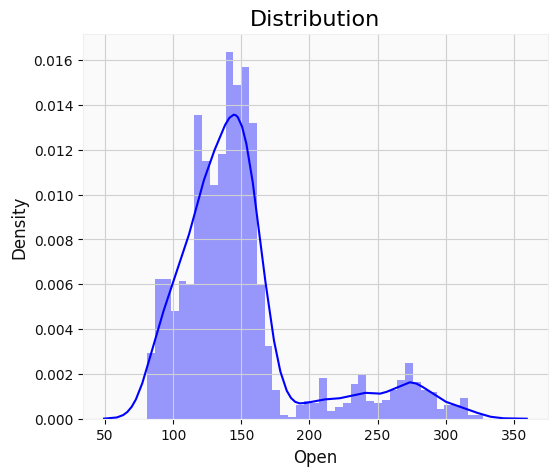

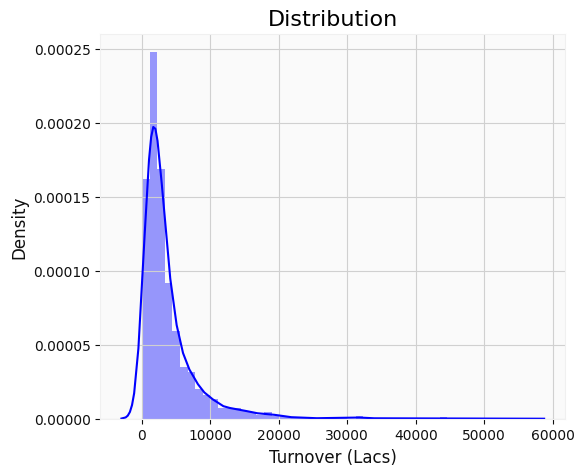

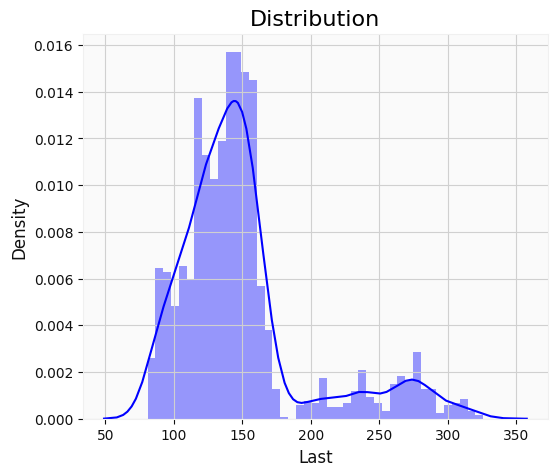

In [58]:
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

In [62]:
X = df.drop(columns=['Close','Date'])
y = df['Close']

In [63]:
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)


In [65]:
X_train.shape

(1628, 6)

In [66]:
X_test.shape

(407, 6)

In [67]:
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [68]:
round(linear_reg.score(X_train,y_train), 3)

0.969

In [69]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)

In [70]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.001
RMSE : 0.023
MAE : 0.018
MAPE : 0.008
R2 : 0.967


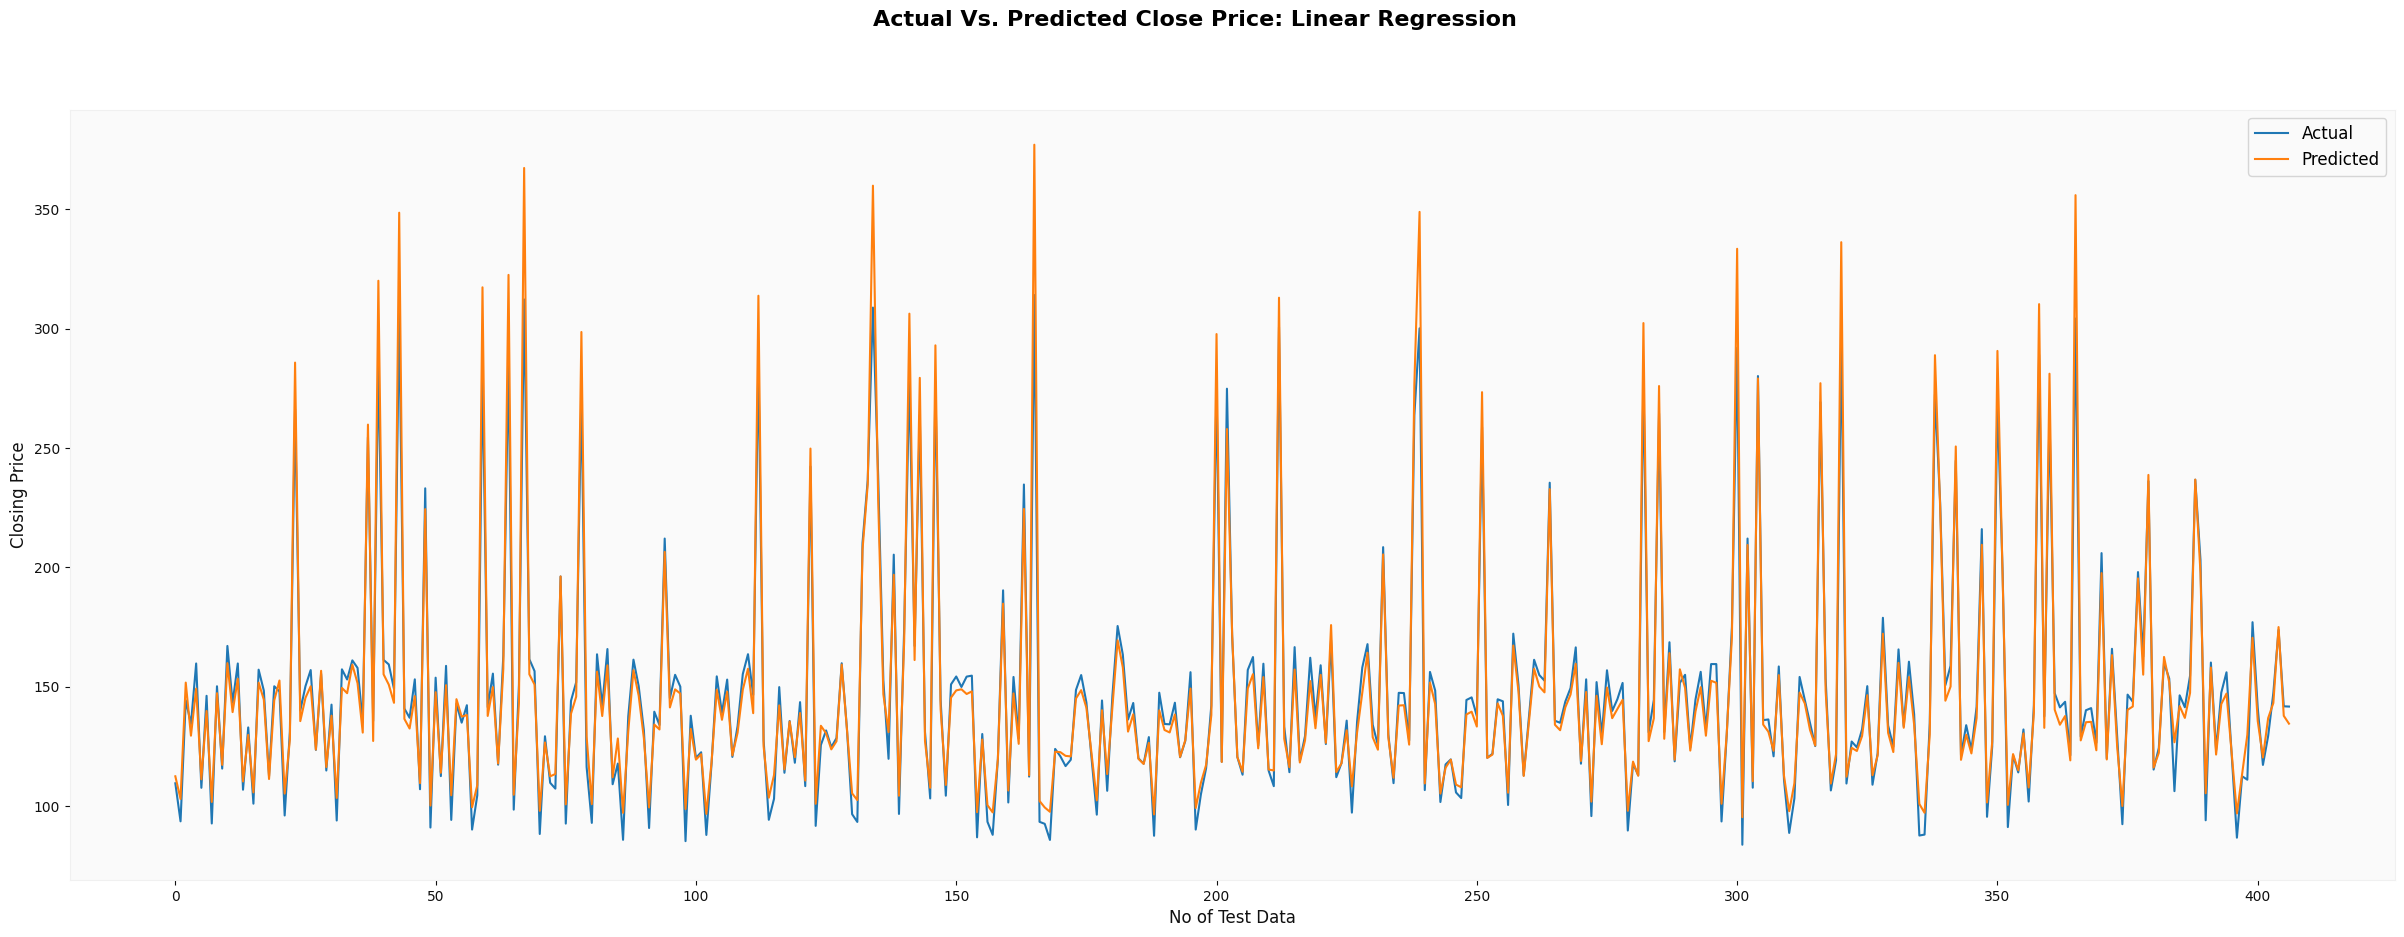

In [71]:
plt.figure(figsize=(30,10))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()